# Защита персональных данных клиентов

## Загрузка данных

In [1]:
import pandas as pd
import random as r
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [2]:
try:
    data = pd.read_csv('insurance.csv')
except:
    print('Ошибка загрузки данных')
    
data.head()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [4]:
# проверка данных на пропуски и явные дубликаты

print('Количество явных дубликатов:', data.duplicated().sum())
print()
print('Количество пропусков по столбцам', data.isna().sum(), sep='\n')

Количество явных дубликатов: 153

Количество пропусков по столбцам
Пол                  0
Возраст              0
Зарплата             0
Члены семьи          0
Страховые выплаты    0
dtype: int64


In [5]:
# удаление явных дубликатов

data = data.drop_duplicates().reset_index(drop=True)

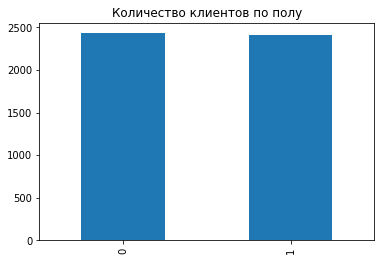

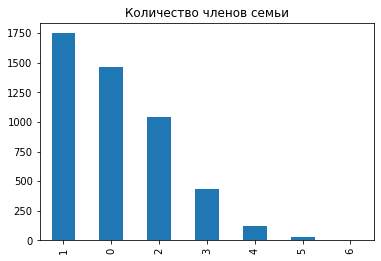

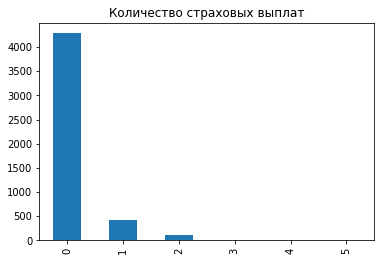

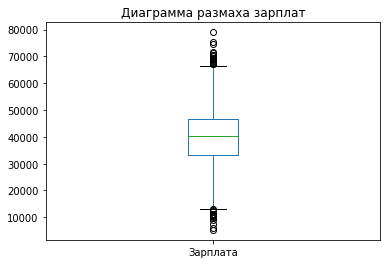

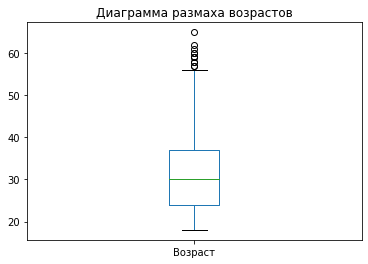

In [6]:
# графический анализ признаков

data['Пол'].value_counts().plot(kind='bar', title = 'Количество клиентов по полу')                    
plt.show()

data['Члены семьи'].value_counts().plot(kind='bar', title = 'Количество членов семьи')                   
plt.show()

data['Страховые выплаты'].value_counts().plot(kind='bar', title = 'Количество страховых выплат')                    
plt.show()

data['Зарплата'].plot(kind='box', title = 'Диаграмма размаха зарплат')                    
plt.show()

data['Возраст'].plot(kind='box', title = 'Диаграмма размаха возрастов')                    
plt.show()

**Вывод.**

Данные были проверены на пропуски, удалены явные дубликаты. Проведён графический анализ данных.

## Умножение матриц

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания (формула 1):

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения (формула 2):

$$
w = (X^T X)^{-1} X^T y
$$

**Ответ:** не изменится.

**Обоснование:** $$
a = Xw = XEw = XPP^{-1}w = (XP)P^{-1}w = (XP)w'
$$

$$
w' = ((XP)^T XP)^{-1} (XP)^T y
$$
$$
w' = (P^T (X^T X) P)^{-1} (XP)^T y
$$
$$
w' = P^{-1} (X^T X)^{-1} (P^T)^{-1} P^T X^T y 
$$

$$
(P^T)^{-1} P^T = E
$$

$$
w' = P^{-1} (X^T X)^{-1} X^T y = P^{-1}w 
$$

## Алгоритм преобразования

**Алгоритм**

Следовательно необходимо создать обратимую матрицу $P$, на которую будут умножаться признаки для получения новых зашифрованных признаков. Размерность матрицы $P$ - (n×n), где n - количество признаков.

**Обоснование**

Умножение на матрицу $P$ размерностью (nxn) позволит сохранить размерность матрицы признаков, зашифровав при этом её значения.

## Проверка алгоритма

**Проверка качества модели на незашифрованных данных.**

In [7]:
# создание обучающей и валидационной выборок

features = data.drop('Страховые выплаты', axis=1)
target = data['Страховые выплаты']

features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.25, random_state=12345)

In [8]:
#масштабирование признаков

numeric = features_train.columns

scaler = StandardScaler()
scaler.fit(features_train[numeric])

features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])

pd.options.mode.chained_assignment = None

In [9]:
model = LinearRegression()
model.fit(features_train, target_train)
predictions = model.predict(features_valid)
print('Оценка R2 модели для исходных признаков:', r2_score(target_valid, predictions))

Оценка R2 модели для исходных признаков: 0.4230772749214825


**Проверка качества модели на зашифрованных данных.**

In [10]:
# функция для создания матрицы-ключа и матрицы новых признаков

# для того чтобы квадратная матрица имела обратную, необходимо и достаточно, чтобы её определитель был отличен от нуля

def cipher(features):
    
    n = features.shape[1]
    r.seed(102)
    det = 0
    while det == 0:
        cipher_matrix = np.array([[r.randint(-100, 100) for _ in range(n)] for _ in range(n)])
        det = np.linalg.det(cipher_matrix)
    new_features = features @ cipher_matrix
        
    print('Обратимая матрица')
    display(cipher_matrix)
    print()
    print('Новые признаки')
    display(new_features.head())
    
    return cipher_matrix, new_features

In [11]:
cipher_matrix, new_features = cipher(features)

Обратимая матрица


array([[-63,  73,  57,  -9],
       [-57,  41,  82,  69],
       [ 55, -54,  -2, -26],
       [ 58,   9,  44,  48]])


Новые признаки


,0,1,2,3
0,2725658.0,-2676637.0,-95737.0,-1286732.0
1,2087436.0,-2050105.0,-72184.0,-984778.0
2,1153347.0,-1132811.0,-39622.0,-543999.0
3,2292419.0,-2250921.0,-81590.0,-1082655.0
4,1433841.0,-1408179.0,-49847.0,-676677.0


Видно, что данные изменились на такие, которые нельзя каким-либо образом интерпретировать. 

In [12]:
# разбиение на обучающую и валидационную выборки

features_train, features_valid, target_train, target_valid = train_test_split(
    new_features, target, test_size=0.25, random_state=12345)

In [13]:
#масштабирование признаков

numeric = features_train.columns

scaler = StandardScaler()
scaler.fit(features_train[numeric])

features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])

pd.options.mode.chained_assignment = None

In [14]:
model = LinearRegression()
model.fit(features_train, target_train)
predictions = model.predict(features_valid)
print('Оценка R2 модели для зашифрованных признаков:', r2_score(target_valid, predictions)) 

Оценка R2 модели для зашифрованных признаков: 0.4230772749214684


**Вывод.**

Для обоих типов признаков, исходных и зашифрованных, оценка R2 одинакова.

## Вывод

В ходе проекта был реализован метод шифрования данных с помощью домножения исходных признаков на обратимую матрицу, применение которого не уменьшало значение оценки R2. Значение оценки R2 на исходных и зашифрованных данных равно 0.4230772749214684.